<center><h2>
<a href="https://rebrand.ly/github-of-masum">Kindly visit my portfolio to see more of my works</a>
</h2></center>

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from dask import dataframe as dd
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

In [2]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\Concatenated_Data_Before_Feature_Engineering\\imbalanced_row_cleaned_data.csv"
df = readCSV_Function(filePath)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df = shuffle(df)

In [3]:
df.nunique()

Protocol                         3
Flow Duration               110812
Total Fwd Packets              326
Total Backward Packets         104
Fwd Packets Length Total      2438
                             ...  
Idle Mean                    47058
Idle Std                     39036
Idle Max                     47069
Idle Min                     46975
Label                           11
Length: 78, dtype: int64

#### Dropping categorical columns that have one category predominance

In [4]:
unique_value_columns = [col for col in df.columns if df[col].nunique() == 1]
unique_value_columns

['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

<center><h4 style="background:#ADFF2F;color:black">
Performing drop operation & saving that in new csv
</h4></center>

In [5]:
df.drop(columns=unique_value_columns, inplace=True)
df.shape

(299880, 66)

In [6]:
def dataCleaningResultToAnotherCSV(dataFrameArg, dirPath, file_name):
    dataFrameArg.to_csv(dirPath + file_name)

newCsvPath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\"
csvFileName = "after_dropping_unique_data_containing_features.csv"
dataCleaningResultToAnotherCSV(dataFrameArg=df, dirPath=newCsvPath, file_name=csvFileName)

#### As we visualized the heatmap of the remaining 66 features, now need to find out the co-relation pairs
#### But Before that, need to apply encoding of categorical data, such as "Label" feature

In [7]:
le = preprocessing.LabelEncoder()
before_encoding_dataframe = df.copy(deep=True)
before_encoding_dataframe.head(5) # see the Label feature

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
481         17            495                 12                       0   
2514        17         215682                  6                       0   
2122        17            560                  4                       0   
1016        17             59                  4                       0   
1915        17         218278                  6                       0   

      Fwd Packets Length Total  Bwd Packets Length Total  \
481                    17664.0                       0.0   
2514                    2088.0                       0.0   
2122                    1760.0                       0.0   
1016                    5888.0                       0.0   
1915                    2088.0                       0.0   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
481                  1472.0                 1472.0                  1472.0   
2514                  393.0                  321.0                   348.0   
2122                  440.0                  440.0                   440.0   
1016                 1472.0                 1472.0                  1472.0   
1915                  393.0                  321.0                   348.0   

      Fwd Packet Length Std  ...  Fwd Seg Size Min  Active Mean  Active Std  \
481                0.000000  ...                 0          0.0         0.0   
2514              35.088459  ...                20          0.0         0.0   
2122               0.000000  ...                20          0.0         0.0   
1016               0.000000  ...              1432          0.0         0.0   
1915              35.088459  ...                20          0.0         0.0   

      Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  \
481          0.0         0.0        0.0       0.0       0.0       0.0   
2514         0.0         0.0        0.0       0.0       0.0       0.0   
2122         0.0         0.0        0.0       0.0       0.0       0.0   
1016         0.0         0.0        0.0       0.0       0.0       0.0   
1915         0.0         0.0        0.0       0.0       0.0       0.0   

           Label  
481   DrDoS_LDAP  
2514  DrDoS_SSDP  
2122   DrDoS_NTP  
1016  DrDoS_LDAP  
1915   DrDoS_UDP  

[5 rows x 66 columns]

In [8]:
df["Label"] = le.fit_transform(df["Label"])
df["Label"] = pd.to_numeric(df['Label'], downcast='integer')
df.head(5) # see the Label feature

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
481         17            495                 12                       0   
2514        17         215682                  6                       0   
2122        17            560                  4                       0   
1016        17             59                  4                       0   
1915        17         218278                  6                       0   

      Fwd Packets Length Total  Bwd Packets Length Total  \
481                    17664.0                       0.0   
2514                    2088.0                       0.0   
2122                    1760.0                       0.0   
1016                    5888.0                       0.0   
1915                    2088.0                       0.0   

      Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
481                  1472.0                 1472.0                  1472.0   
2514                  393.0                  321.0                   348.0   
2122                  440.0                  440.0                   440.0   
1016                 1472.0                 1472.0                  1472.0   
1915                  393.0                  321.0                   348.0   

      Fwd Packet Length Std  ...  Fwd Seg Size Min  Active Mean  Active Std  \
481                0.000000  ...                 0          0.0         0.0   
2514              35.088459  ...                20          0.0         0.0   
2122               0.000000  ...                20          0.0         0.0   
1016               0.000000  ...              1432          0.0         0.0   
1915              35.088459  ...                20          0.0         0.0   

      Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  
481          0.0         0.0        0.0       0.0       0.0       0.0      2  
2514         0.0         0.0        0.0       0.0       0.0       0.0      6  
2122         0.0         0.0        0.0       0.0       0.0       0.0      4  
1016         0.0         0.0        0.0       0.0       0.0       0.0      2  
1915         0.0         0.0        0.0       0.0       0.0       0.0      7  

[5 rows x 66 columns]

<center><h3 style="background:#FF00FF;color:black">
Encoding of "Label" visualization
</h3></center>

In [9]:
Label_keys = list(before_encoding_dataframe.Label)
Label_values = list(df.Label)
# Label_tuples = list(zip(Label_keys,Label_values)) # # creating tuples from above two lists
# Label_visualize_df = pd.DataFrame(Label_tuples, columns=['Label','Encoding'])
Label_dict = dict(Label = Label_keys,Encoding = Label_values)
Label_visualize_df = pd.DataFrame.from_dict(Label_dict)
Label_visualize_df.drop_duplicates(inplace=True)
Label_visualize_df.reset_index(inplace=True, drop=True)
Label_visualize_df

Label  Encoding
0    DrDoS_LDAP         2
1    DrDoS_SSDP         6
2     DrDoS_NTP         4
3     DrDoS_UDP         7
4   DrDoS_MSSQL         3
5       UDP-lag        10
6          TFTP         9
7    DrDoS_SNMP         5
8     DrDoS_DNS         1
9           Syn         8
10       BENIGN         0

<center><h4 style="background:#ADFF2F;color:black">
Saving the after encoding dataframe into new csv
</h4></center>

In [10]:
dirPath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\"
csvFileName = "After_Label_Encoding.csv"
encodingFileName = "Label_Encoding.csv"

Label_visualize_df.to_csv(dirPath+encodingFileName)
df.to_csv(dirPath + csvFileName)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299880 entries, 481 to 546
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  299880 non-null  int64  
 1   Flow Duration             299880 non-null  int64  
 2   Total Fwd Packets         299880 non-null  int64  
 3   Total Backward Packets    299880 non-null  int64  
 4   Fwd Packets Length Total  299880 non-null  float64
 5   Bwd Packets Length Total  299880 non-null  float64
 6   Fwd Packet Length Max     299880 non-null  float64
 7   Fwd Packet Length Min     299880 non-null  float64
 8   Fwd Packet Length Mean    299880 non-null  float64
 9   Fwd Packet Length Std     299880 non-null  float64
 10  Bwd Packet Length Max     299880 non-null  float64
 11  Bwd Packet Length Min     299880 non-null  float64
 12  Bwd Packet Length Mean    299880 non-null  float64
 13  Bwd Packet Length Std     299880 non-null  fl

<center><h3 style="background:orange;color:black">
Hypothesis Testing
</h3></center>

##### Null Hypothesis(H0): There exists no co-relation between two features
##### Alternative Hypothesis (H1): opposite of null hypothesis

<center><h3 style="background:yellow;color:black">
Chi-Squared Test
</h3></center>

In [11]:
from scipy.stats import chi2_contingency
def chi_squared_test(feature1,feature2):
    stat ,p, dof, expected = chi2_contingency(pd.crosstab(feature1,feature2))
    alpha = 0.05
    if p > alpha:
        return f"They are independent & P-value: {p}"
    else:
        return f"Co-related & P-value: {p}"

In [12]:
present_columns = sorted(df)
present_columns

['ACK Flag Count',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Avg Bwd Segment Size',
 'Avg Fwd Segment Size',
 'Avg Packet Size',
 'Bwd Header Length',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Total',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Min',
 'Bwd Packet Length Std',
 'Bwd Packets Length Total',
 'Bwd Packets/s',
 'CWE Flag Count',
 'Down/Up Ratio',
 'Flow Bytes/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Packets/s',
 'Fwd Act Data Packets',
 'Fwd Header Length',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Total',
 'Fwd PSH Flags',
 'Fwd Packet Length Max',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Min',
 'Fwd Packet Length Std',
 'Fwd Packets Length Total',
 'Fwd Packets/s',
 'Fwd Seg Size Min',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Bytes',
 'Init Fwd Win Bytes',
 'Label',
 'P

##### Relation between Syn Flag count vs Protocol

In [13]:
pd.crosstab(df['SYN Flag Count'],df['Protocol'])

Protocol         0      6       17
SYN Flag Count                    
0               237  55698  243845
1                 0    100       0

In [14]:
chi_squared_test(df['SYN Flag Count'],df['Protocol'])

'Co-related & P-value: 9.543879427215319e-96'

##### Relation between RST Flag count vs Protocol

In [15]:
pd.crosstab(df['RST Flag Count'],df['Protocol'])

Protocol         0      6       17
RST Flag Count                    
0               237  55226  243845
1                 0    572       0

In [16]:
chi_squared_test(df['RST Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

##### Relation between CWE Flag count vs Protocol

In [17]:
pd.crosstab(df['CWE Flag Count'],df['Protocol'])

Protocol         0      6       17
CWE Flag Count                    
0               237  54503  243845
1                 0   1295       0

In [18]:
chi_squared_test(df['CWE Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

##### Relation between URG Flag count vs Protocol

In [19]:
pd.crosstab(df['URG Flag Count'],df['Protocol'])

Protocol         0      6       17
URG Flag Count                    
0               237  53043  243845
1                 0   2755       0

In [20]:
chi_squared_test(df['URG Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

<center><h3 style="background:yellow;color:black">
T Test
</h3></center>

In [21]:
from scipy.stats import ttest_ind
def t_value_test(feature1,feature2):
    score = ttest_ind(feature1,feature2,equal_var=False)[1]
    if score > 0.05:
        return f"Co-related & T-score: {score}"
    return f"They are independent & T-score: {score}"

##### Relation between Flow Duration vs FWD IAT Total

In [22]:
t_value_test(df['Flow Duration'],df['Fwd IAT Total'])

'Co-related & T-score: 0.9367598155226453'

<center><h3 style="background:yellow;color:black">
Pearson co-variance implementation
</h3></center>

In [23]:
Pearson_Threshold = 0.9
count = 0
for i in df.columns:
   for j in df.columns:
       if i!= j:
           corr,_ = stats.pearsonr(df[i],df[j])
           if corr >= Pearson_Threshold:
               count = count + 1
               print(f"Pearson co-relation between {i} & {j} : {corr:.3f}")

print("\n###########################################################################")
print(f"Found above pearson threshold co-related pairs: {count}")

Pearson co-relation between Flow Duration & Fwd IAT Total : 1.000
Pearson co-relation between Total Fwd Packets & Subflow Fwd Packets : 1.000
Pearson co-relation between Total Backward Packets & Subflow Bwd Packets : 1.000
Pearson co-relation between Fwd Packets Length Total & Subflow Fwd Bytes : 1.000
Pearson co-relation between Fwd Packets Length Total & Fwd Act Data Packets : 0.997
Pearson co-relation between Bwd Packets Length Total & Subflow Bwd Bytes : 1.000
Pearson co-relation between Fwd Packet Length Max & Fwd Packet Length Min : 0.989
Pearson co-relation between Fwd Packet Length Max & Fwd Packet Length Mean : 0.996
Pearson co-relation between Fwd Packet Length Max & Packet Length Min : 0.988
Pearson co-relation between Fwd Packet Length Max & Packet Length Max : 0.988
Pearson co-relation between Fwd Packet Length Max & Packet Length Mean : 0.996
Pearson co-relation between Fwd Packet Length Max & Avg Packet Size : 0.988
Pearson co-relation between Fwd Packet Length Max & Avg

<center><h3 style="background:orange;color:black">
Need to reduce dimentionality of those above co-related pairs using PCA
</h3></center>

##### But before applying PCA, need to data standardization & Compute the covariance matrix

In [24]:
Y = df["Label"]
X = df.drop("Label",axis=1)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

X_std = StandardScaler().fit_transform(X) # data standardized / scaled here
X_norm = preprocessing.normalize(X_std)
mean_vec = np.mean(X_std,axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat # 65 rows & 65 columns [will be same as features]

array([[ 1.00000333, -0.76897785, -0.06554627, ..., -0.63860511,
        -0.82126647, -0.78799511],
       [-0.76897785,  1.00000333, -0.00220049, ...,  0.78698892,
         0.89175367,  0.7050974 ],
       [-0.06554627, -0.00220049,  1.00000333, ..., -0.00646788,
        -0.00827141, -0.00803494],
       ...,
       [-0.63860511,  0.78698892, -0.00646788, ...,  1.00000333,
         0.85982902,  0.54049528],
       [-0.82126647,  0.89175367, -0.00827141, ...,  0.85982902,
         1.00000333,  0.87980158],
       [-0.78799511,  0.7050974 , -0.00803494, ...,  0.54049528,
         0.87980158,  1.00000333]])

#### Plotting the co-variance matrix (it just too blurry)

cov_mat_img = plt.matshow(cov_mat,cmap=plt.cm.rainbow)
plt.colorbar(cov_mat_img,ticks=[-1,0,1],fraction=0.025)
# for x in range(cov_mat.shape[0]):
#     for y in range(cov_mat.shape[1]):
#         plt.text(x, y, "%0.2f" % cov_mat[x,y], size=12, color='black', ha="center", va="center")
plt.figure(figsize=(60,60))
plt.show()

#### Eigen decomposition of co-variance matrix

In [26]:
eig_values, eigen_vec = np.linalg.eig(cov_mat)
print(f"Eigen Vectors of co-variance matrix:\n {eigen_vec}")
print("\n###################################################################\n")
print(f"Eigen values of co-variance matrix:\n {eig_values}")

Eigen Vectors of co-variance matrix:
 [[-2.13273726e-01+0.j  8.42769427e-03+0.j  6.72549004e-02+0.j ...
  -6.40768048e-14+0.j  3.57680103e-14+0.j -8.74714672e-16+0.j]
 [ 2.06079573e-01+0.j -3.98557709e-02+0.j -1.29848493e-01+0.j ...
  -2.70214198e-12+0.j  2.33230468e-12+0.j  7.63823334e-13+0.j]
 [ 3.07873020e-03+0.j  1.30885848e-02+0.j  1.13300397e-02+0.j ...
   4.08327097e-01+0.j -1.58911588e-01+0.j  3.14408045e-01+0.j]
 ...
 [ 1.79714630e-01+0.j -5.50507078e-02+0.j -1.22251502e-01+0.j ...
  -3.60907322e-16+0.j  3.93380707e-15+0.j -3.33504173e-15+0.j]
 [ 2.20272091e-01+0.j -4.77112170e-02+0.j -1.38286108e-01+0.j ...
  -1.06056206e-13+0.j  2.31900225e-14+0.j -7.19341074e-15+0.j]
 [ 2.02183039e-01+0.j -3.03473432e-02+0.j -1.14539913e-01+0.j ...
  -1.36893606e-15+0.j  2.51120429e-15+0.j -1.83927829e-15+0.j]]

###################################################################

Eigen values of co-variance matrix:
 [ 1.68226356e+01+0.00000000e+00j  6.94587958e+00+0.00000000e+00j
  5.922574

#### Now need to select the principal components

In [27]:
eig_pairs = [(np.abs(eig_values[i]),eigen_vec[:,i]) for i in range(len(eig_values))]
# here, eig_pairs data_types are list of tuples(eig_values,eigen_vec)
# need to sort in descending order
eig_pairs.sort(key=lambda x: x[0],reverse=True)
# ok need to visualize the descending sort of eigen pairs
for i,j in enumerate(eig_pairs):
    print(i,j[0])

0 16.822635592073173
1 6.945879580885627
2 5.922574794480811
3 3.6021438255105647
4 3.0577923887188105
5 2.9998774556936194
6 2.505587295525782
7 2.169912567862161
8 2.006487830262197
9 1.9659259858433193
10 1.9232276919521067
11 1.8380006405904334
12 1.2907201104336048
13 1.2395325380811018
14 1.0772360931792078
15 1.0386805486512416
16 1.0185008022478241
17 0.9864782811463152
18 0.9382696400909444
19 0.9110218106174536
20 0.8071694666897477
21 0.6981674484704451
22 0.6108914488048652
23 0.5245514297758547
24 0.43246465794385525
25 0.3365009892535986
26 0.30232351800885726
27 0.20759051014699262
28 0.18432647170389993
29 0.1638508204851909
30 0.1067856174564435
31 0.09152345624580396
32 0.07133865356567638
33 0.04616285373202835
34 0.04180514885880275
35 0.0241567750591969
36 0.022327559546173065
37 0.01581721320998141
38 0.011907028720074606
39 0.00902100923654569
40 0.0062671783082601995
41 0.004087741202892101
42 0.0038359570516547756
43 0.0034262420623216512
44 0.00324662098298043

##### after 40 (if threshold= 0.005), it seems it has too little insignificance

##### Explained Variance

In [28]:
tot = sum(eig_values)
exp_var = [(i/tot)*100 for i in sorted(eig_values,reverse=True)]
# exp_var

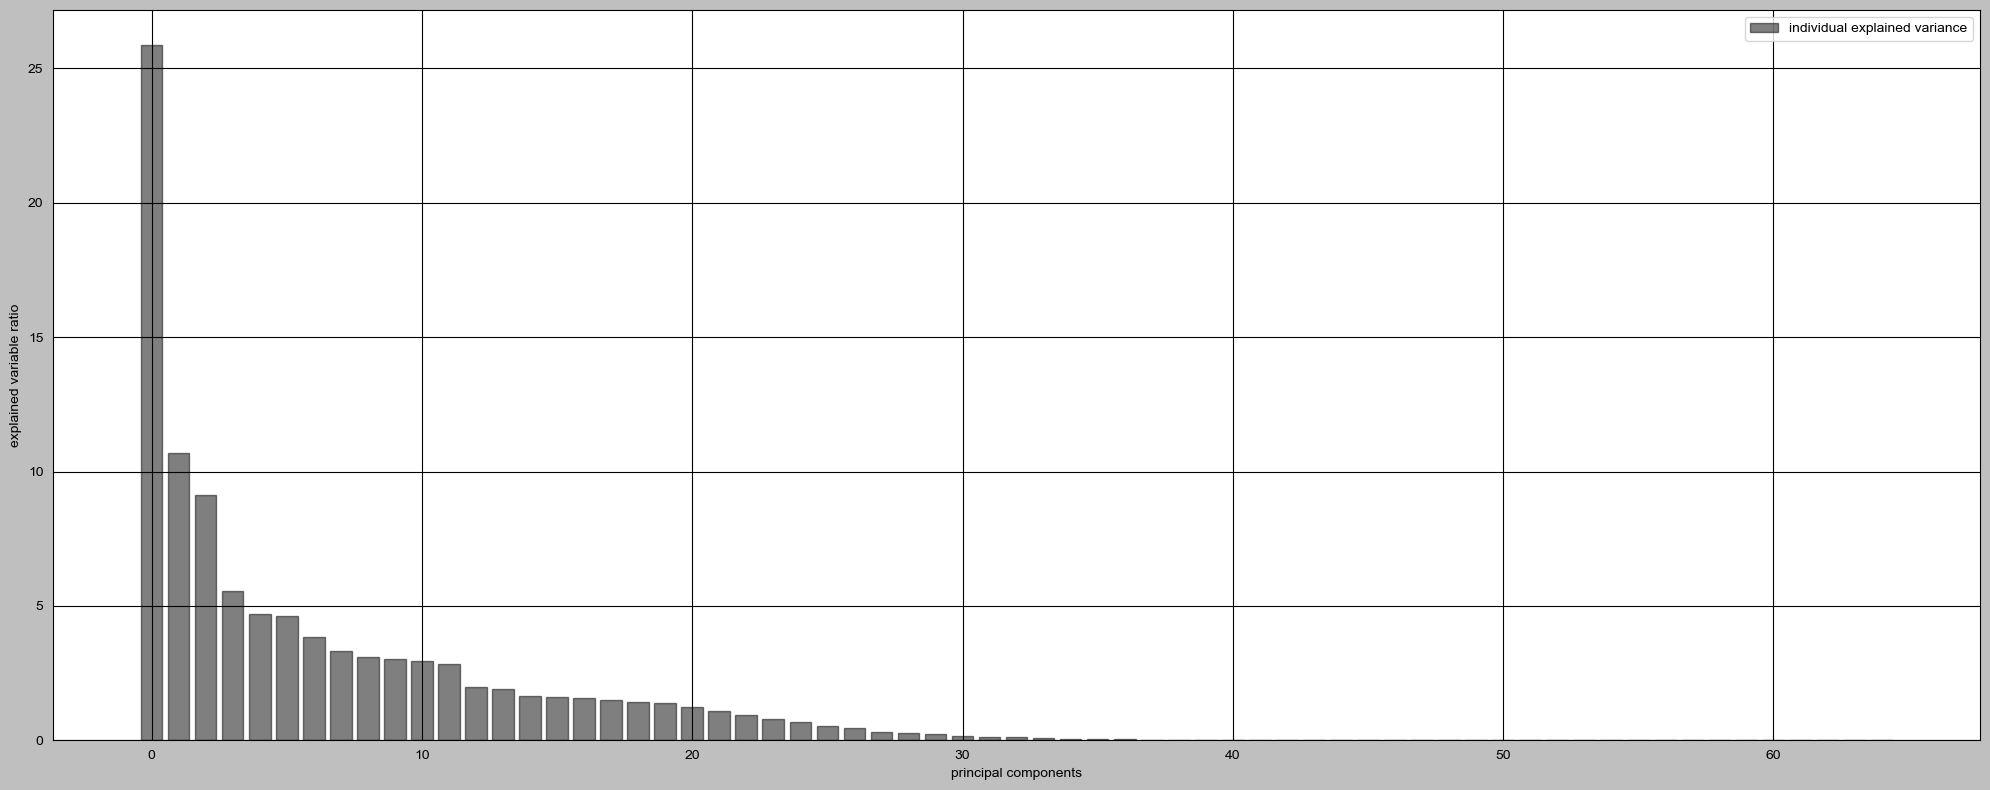

In [29]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "PCA_explained_variance.png"
with plt.style.context(style="grayscale"):
    plt.figure(figsize=(20,8))
    plt.bar(x=range(len(X.columns)),height=exp_var,alpha=0.5,align="center",label="individual explained variance")
    plt.legend(loc="best")
    plt.xlabel("principal components")
    plt.ylabel("explained variable ratio")
    plt.tight_layout()
    plt.savefig(imgPath+imgName)

##### Camulative Explained Variance

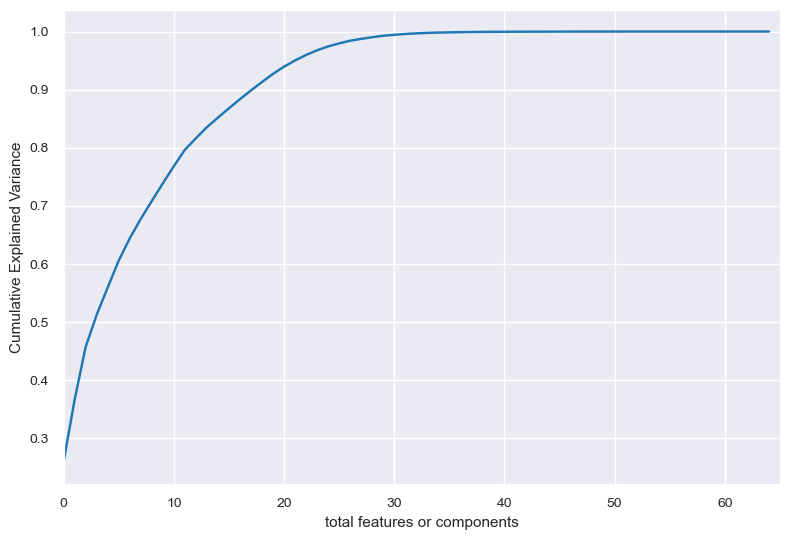

In [30]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "PCA_Cumulative_explained_variance.png"

with plt.style.context(style="seaborn-notebook"):
    pca = PCA().fit(X_std) # note: Here to draw the cumulative distribution graph, PCA is fitted into Standardized independent variables
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel("total features or components")
    plt.ylabel("Cumulative Explained Variance")
    plt.xlim(0,len(X.columns),1)
    plt.tight_layout()
    plt.savefig(imgPath+imgName)

In [31]:
model = PCA(n_components=0.99999).fit(X_norm)
X_pc = model.transform(X_norm)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = list(X.columns)
# get the names
pca_features = list(set(initial_feature_names[most_important[i]] for i in range(n_pcs)))
print(f"Principal Components: {n_pcs} \nSelected Features: {len(pca_features)}")
pca_features

Principal Components: 48 
Selected Features: 39


['Active Max',
 'Fwd Act Data Packets',
 'Fwd IAT Mean',
 'Fwd Packet Length Max',
 'Active Std',
 'Avg Packet Size',
 'Bwd IAT Mean',
 'Idle Max',
 'Bwd IAT Max',
 'Total Fwd Packets',
 'Bwd Packet Length Min',
 'Fwd IAT Min',
 'Bwd Header Length',
 'Protocol',
 'Init Fwd Win Bytes',
 'Packet Length Variance',
 'Idle Min',
 'Init Bwd Win Bytes',
 'Flow IAT Mean',
 'Flow Packets/s',
 'Fwd Packet Length Std',
 'URG Flag Count',
 'Idle Std',
 'Flow Bytes/s',
 'Bwd Packet Length Max',
 'CWE Flag Count',
 'Down/Up Ratio',
 'ACK Flag Count',
 'Packet Length Std',
 'Fwd Seg Size Min',
 'Fwd Header Length',
 'SYN Flag Count',
 'Subflow Bwd Packets',
 'Bwd IAT Min',
 'Active Min',
 'Packet Length Min',
 'Bwd Packet Length Std',
 'Bwd Packets/s',
 'Bwd IAT Total']

##### But some features did not selected in PCA though we performed hypothesis testing & decided to keep those features. As PCA is unsupervised Learning Technique & itt only looks for the variances impact over dataset, that's why some features like (URG, CWE, FWD Push flags to keep & Fwd IAT total) from T value & Chi-Square Test

In [32]:
features_from_hypothesis_test = ['Flow Duration','Fwd IAT Total','URG Flag Count','CWE Flag Count','RST Flag Count','SYN Flag Count','Protocol','Label']
s1 = set(pca_features)
s2 = set(features_from_hypothesis_test)
final_selected_features = sorted(list(s1.union(s2)))
print(f"Final Selected Features: {len(final_selected_features)}")
final_selected_features

Final Selected Features: 43


['ACK Flag Count',
 'Active Max',
 'Active Min',
 'Active Std',
 'Avg Packet Size',
 'Bwd Header Length',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Total',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Std',
 'Bwd Packets/s',
 'CWE Flag Count',
 'Down/Up Ratio',
 'Flow Bytes/s',
 'Flow Duration',
 'Flow IAT Mean',
 'Flow Packets/s',
 'Fwd Act Data Packets',
 'Fwd Header Length',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Total',
 'Fwd Packet Length Max',
 'Fwd Packet Length Std',
 'Fwd Seg Size Min',
 'Idle Max',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Bytes',
 'Init Fwd Win Bytes',
 'Label',
 'Packet Length Min',
 'Packet Length Std',
 'Packet Length Variance',
 'Protocol',
 'RST Flag Count',
 'SYN Flag Count',
 'Subflow Bwd Packets',
 'Total Fwd Packets',
 'URG Flag Count']

<center><h2 style="background:#00FFFF;color:black">
Now need to keep only those final selected features & drop the rest to create model
</h2></center>

In [33]:
# LIST COMPREHENSION HERE AGAIN
length = len(final_selected_features)
dic = {'feature-{}'.format(i): final_selected_features[i] for i in range(length)}

# build the dataframe
selected_features_df = pd.DataFrame(dic.items(),columns=['Features','Names'])
filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Feature_Engineering\\Selected_Features_along_with_PCA.csv"
selected_features_df.to_csv(filePath)
selected_features_df

Features                   Names
0    feature-0          ACK Flag Count
1    feature-1              Active Max
2    feature-2              Active Min
3    feature-3              Active Std
4    feature-4         Avg Packet Size
5    feature-5       Bwd Header Length
6    feature-6             Bwd IAT Max
7    feature-7            Bwd IAT Mean
8    feature-8             Bwd IAT Min
9    feature-9           Bwd IAT Total
10  feature-10   Bwd Packet Length Max
11  feature-11   Bwd Packet Length Min
12  feature-12   Bwd Packet Length Std
13  feature-13           Bwd Packets/s
14  feature-14          CWE Flag Count
15  feature-15           Down/Up Ratio
16  feature-16            Flow Bytes/s
17  feature-17           Flow Duration
18  feature-18           Flow IAT Mean
19  feature-19          Flow Packets/s
20  feature-20    Fwd Act Data Packets
21  feature-21       Fwd Header Length
22  feature-22            Fwd IAT Mean
23  feature-23             Fwd IAT Min
24  feature-24           Fwd IAT Total
25  feature-25   Fwd Packet Length Max
26  feature-26   Fwd Packet Length Std
27  feature-27        Fwd Seg Size Min
28  feature-28                Idle Max
29  feature-29                Idle Min
30  feature-30                Idle Std
31  feature-31      Init Bwd Win Bytes
32  feature-32      Init Fwd Win Bytes
33  feature-33                   Label
34  feature-34       Packet Length Min
35  feature-35       Packet Length Std
36  feature-36  Packet Length Variance
37  feature-37                Protocol
38  feature-38          RST Flag Count
39  feature-39          SYN Flag Count
40  feature-40     Subflow Bwd Packets
41  feature-41       Total Fwd Packets
42  feature-42          URG Flag Count

<center><h4 style="background:yellow;color:black">
These Visualization should be done again after umdersampling & oversampling
</center></h4>

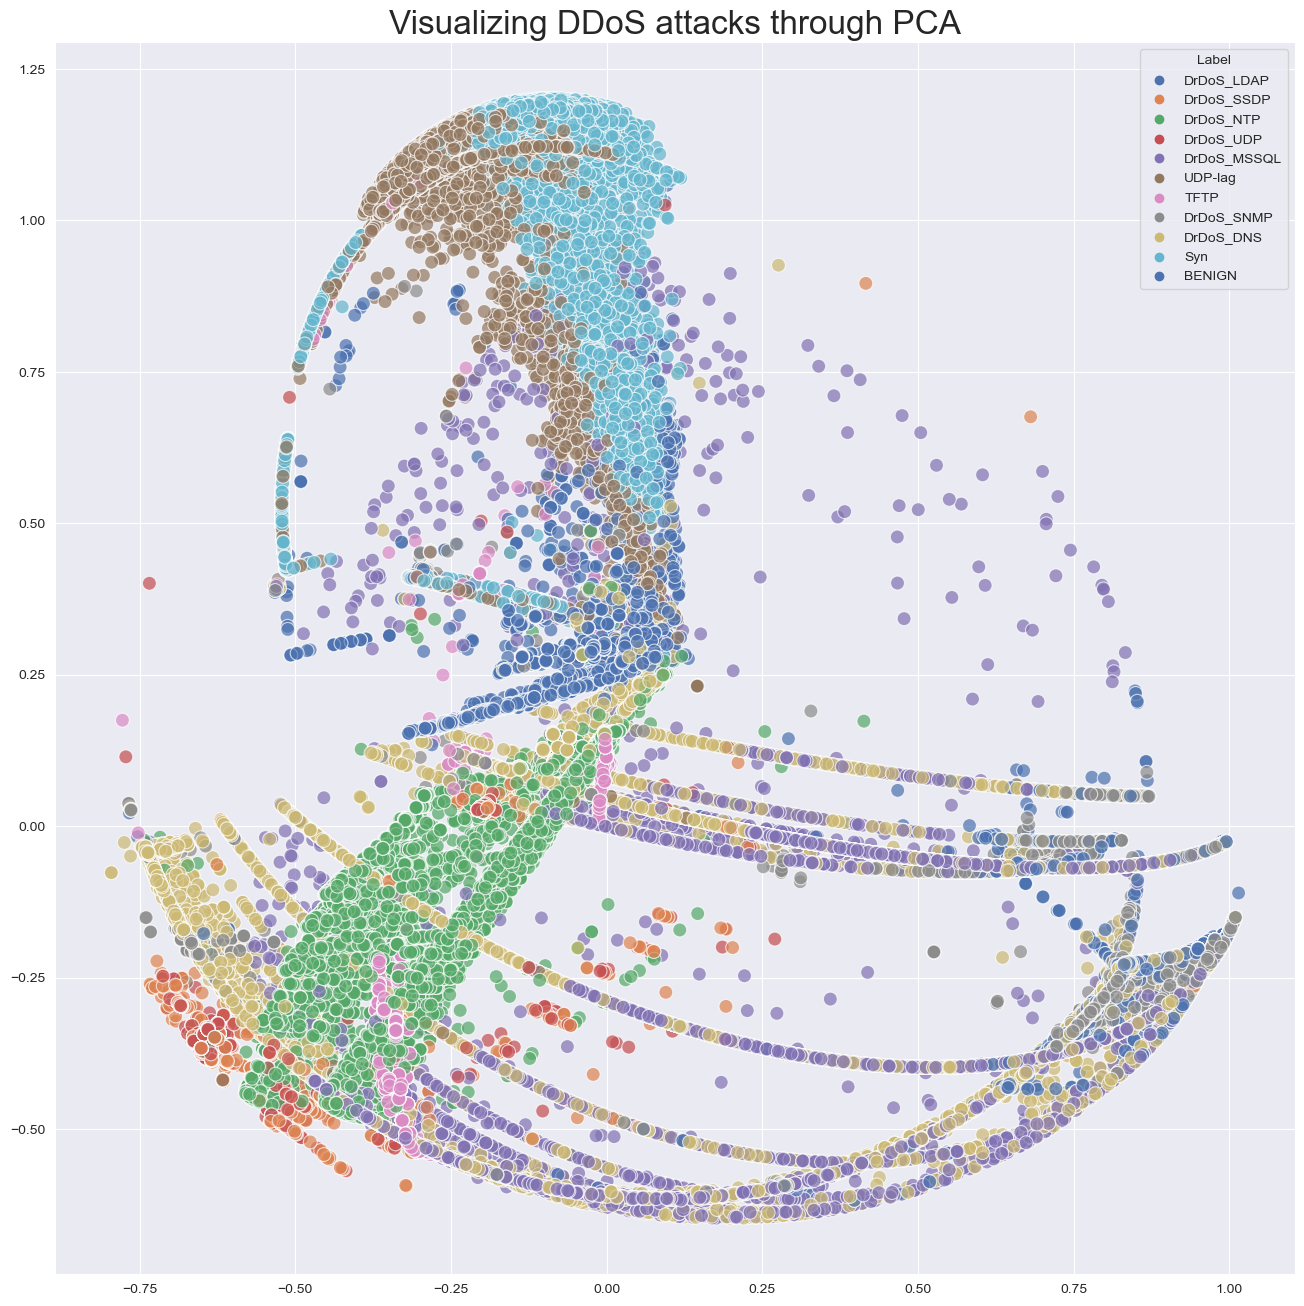

In [34]:
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "Visualizing_DDoS_using_PCA.png"
pca = PCA(n_components=0.99999)
principalComponents = pca.fit_transform(X_norm)
# principalComponents
plt.figure(figsize=(16,16))
sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:, 1] , s= 100, hue=before_encoding_dataframe['Label'], cmap='Spectral',alpha=0.7,sizes=(20, 200), legend="full",palette="deep")
plt.title('Visualizing DDoS attacks through PCA', fontsize=24)
plt.savefig(imgPath+imgName)

In [35]:
import gc
gc.collect()

13316

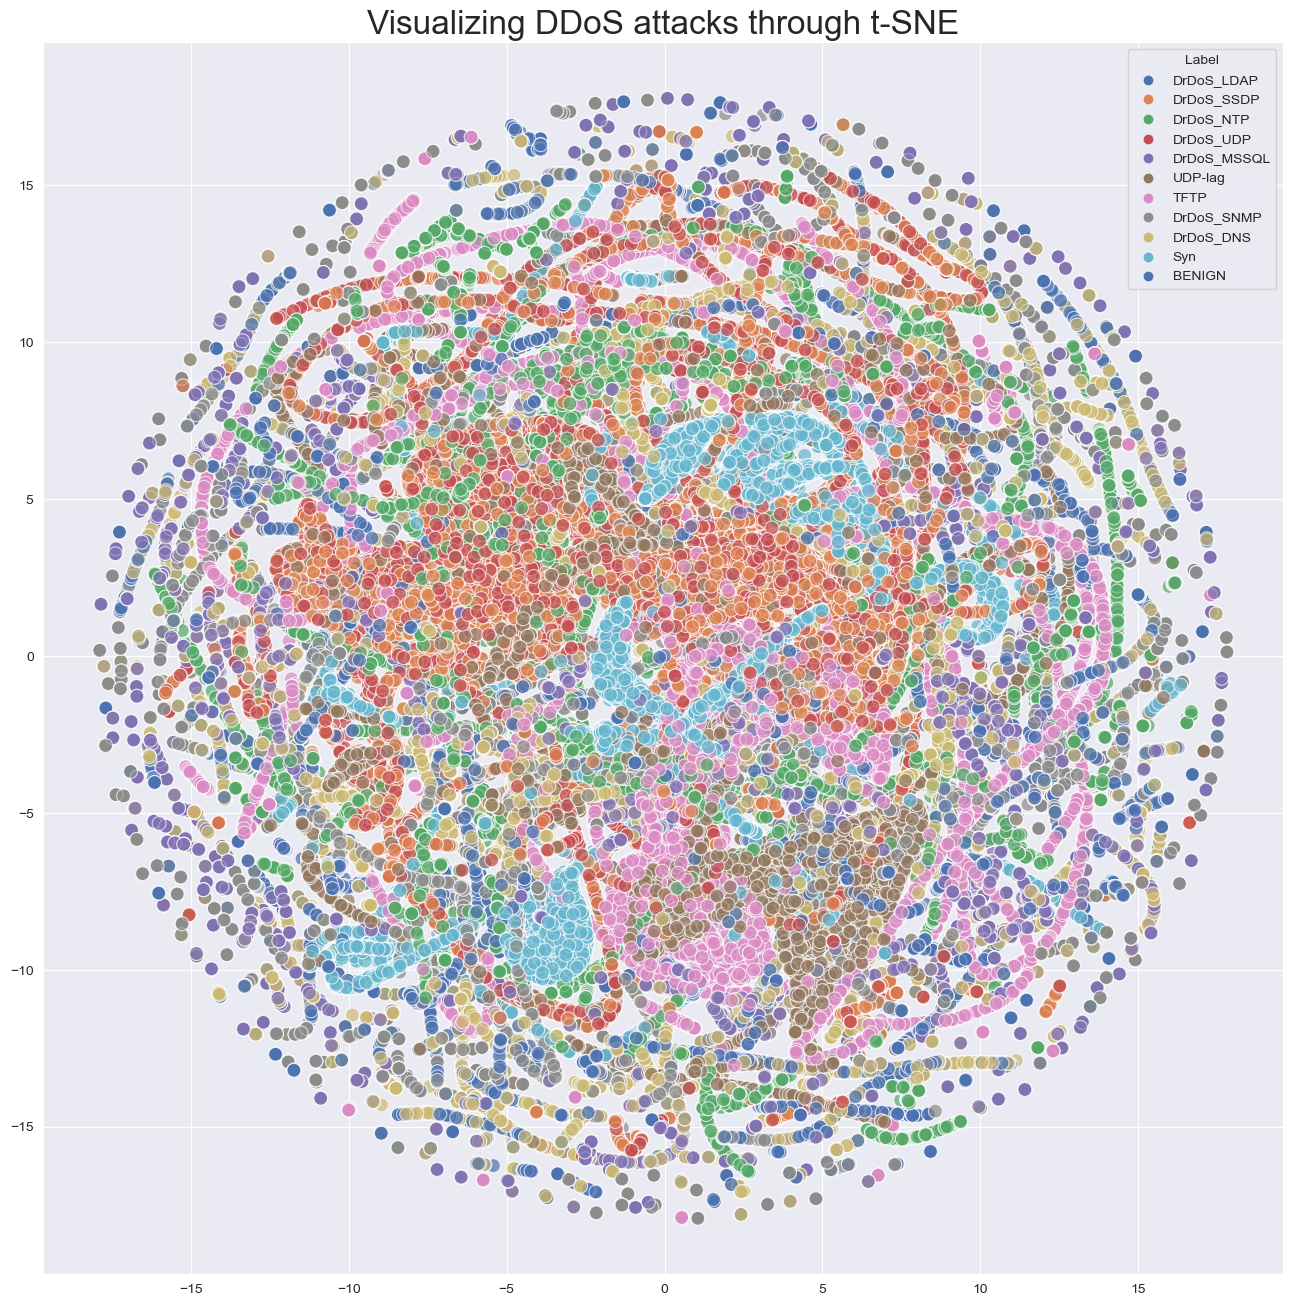

In [36]:
from sklearn.manifold import TSNE

imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "Visualizing_DDoS_using_PCA_tSNE.png"

tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=600).fit_transform(principalComponents)
plt.figure(figsize=(16,16))
sns.scatterplot(x=tsne_[:, 0], y=tsne_[:, 1], s= 100, hue=before_encoding_dataframe['Label'], cmap='Spectral',alpha=0.7,sizes=(20, 200), legend="full",palette="deep")
plt.title('Visualizing DDoS attacks through t-SNE', fontsize=24)
plt.savefig(imgPath+imgName)

##### Clustering couldn't be done due to memory error

In [37]:
from sklearn.cluster import AgglomerativeClustering

imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"
imgName = "Visualizing_DDoS_after_Agglomerate_Clustering.png"
Agglo = AgglomerativeClustering(n_clusters=11)
Agglo.fit(principalComponents)
plt.figure(figsize=(20,16))
plt.scatter(tsne_[:, 0],tsne_[:, 1], c=Agglo.labels_,edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(11))
plt.title('Visualizing DDoS attacks after Agglomerate Clustering', fontsize=24)
plt.show()
plt.savefig(imgPath+imgName)

MemoryError: Unable to allocate 335. GiB for an array with shape (44963857260,) and data type float64